Hello Yair!

My name is Karina. Today I'm reviewing your project.

Firstly, I'll only mark mistakes, if you have them. I'll give you oppotunity to fix it yourself. Of course, I'll add details if where are any difficulties.

Good luck!

Please respond to my comments and mark changes using color codes. 
Below you will find my comments - please do not change them.
You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here)

</div>

Project description
You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.
Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10
Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7





The users table (data on users):
user_id — unique user identifier
first_name — user's name
last_name — user's last name
age — user's age (years)
reg_date — subscription date (dd, mm, yy)
churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
city — user's city of residence
plan — calling plan name
The calls table (data on calls):
id — unique call identifier
call_date — call date
duration — call duration (in minutes)
user_id — the identifier of the user making the call
The messages table (data on texts):
id — unique text message identifier
message_date — text message date
user_id — the identifier of the user sending the text
The internet table (data on web sessions):
id — unique session identifier
mb_used — the volume of data spent during the session (in megabytes)
session_date — web session date
user_id — user identifier
The plans table (data on the plans):
plan_name — calling plan name
usd_monthly_fee — monthly charge in US dollars
minutes_included — monthly minute allowance
messages_included — monthly text allowance
mb_per_month_included — data volume allowance (in megabytes)
usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
usd_per_message — price per text after exceeding the package limits
usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Please, add an introduction here. Some notes about this project, your plans and goals)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Looks like smth went wrong with formating(

In [1]:
import pandas as pd
import statistics
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from functools import reduce
import math
from scipy import stats as st

In [2]:
calls_data= pd.read_csv("/datasets/megaline_calls.csv", sep= ",") 
internet_data= pd.read_csv("/datasets/megaline_internet.csv", sep= ",") 
message_data= pd.read_csv("/datasets/megaline_messages.csv", sep= ",") 
plans_data= pd.read_csv("/datasets/megaline_plans.csv", sep= ",") 
users_data= pd.read_csv("/datasets/megaline_users.csv", sep= ",")  
car_data= pd.read_csv("/datasets/vehicles_us.csv", sep= ",")

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct data loading!

In [3]:
print(plans_data.info())
print(len(plans_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
2


In [4]:
print(plans_data.head(5))


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [5]:
plans_data.describe()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [6]:
plans_data.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [7]:
plans_data.duplicated().sum()

0

There are only 2 rows in plans_data and no duplicated values

In [8]:
def plan_id(plan_name):
    if plan_name == 'surf':
        return 0
    elif plan_name == 'ultimate':
        return 1
    return 2
plans_data['plan_name_id']= plans_data['plan_name'].apply(plan_id)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice idea)

In [9]:
print(plans_data)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   plan_name_id  
0             0  
1             1  


Would be easier to use it with numbers in further tasks

In [10]:
print(users_data.info())
print(len(users_data))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
500


In [11]:
print(users_data.head(10))


   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

In [12]:
users_data.describe()


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [13]:
users_data.describe(include="object")

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Jasper,Kelley,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-08,surf,2018-12-18
freq,3,3,80,5,339,3


In [14]:
print(users_data.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Your data observation part is really good)

2 critical porblems :
1. missing values in churn_date column
2. The "reg_date" and "churn_date" columns are not in their appropriate type, they need to be changed from object to numerical variable

In [15]:
users_data["reg_date"]= pd.to_datetime(users_data["reg_date"], format= "%Y-%m-%d")

In [16]:
users_data["churn_date"]= pd.to_datetime(users_data["churn_date"], format= "%Y-%m-%d")

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great work with datetime format)

In [17]:
print(users_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [18]:
users_data['plan_name_id'] = users_data['plan'].apply(plan_id)
print(users_data.head(5))

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  plan_name_id  
0 2018-12-24  ultimate        NaT             1  
1 2018-08-13      surf        NaT             0  
2 2018-10-21      surf        NaT             0  
3 2018-01-28      surf        NaT             0  
4 2018-05-23      surf        NaT             0  


In [19]:
print(calls_data.info())
print(len(calls_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
137735


In [20]:
print(calls_data.head(10))


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40


In [21]:
calls_data.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [22]:
calls_data.describe(include="object")

,id,call_date
count,137735,137735
unique,137735,351
top,1231_226,2018-12-27
freq,1,1091


In [23]:
print(calls_data.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [24]:
calls_data.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [25]:
print(calls_data.duplicated().sum())

0


First, there are no missing values or duplicated values
Second, we need to change the "user_id" and "call_date" columns to an appropriate type.

In [26]:
 calls_data["call_date"]= pd.to_datetime(calls_data["call_date"], format= "%Y-%m-%d")

In [27]:
calls_data['user_id'] = calls_data.user_id.astype(object)


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well, id could be int, it's not a problem

In [28]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


In [29]:
print(message_data.info())
print(len(message_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
76051


In [30]:
print(message_data.head(10))


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


In [31]:
message_data.describe()


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [32]:
message_data.describe(include="object")

,id,message_date
count,76051,76051
unique,76051,351
top,1059_175,2018-12-28
freq,1,702


In [33]:
message_data.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [34]:
message_data.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [35]:
message_data.duplicated().sum()

0

The "user_id" and "message_date" columns are not in their appropriate type, They need to be changed to object and to_datetime type. In addition, there appear to be no missing or duplicate values.

In [36]:
 message_data["message_date"]= pd.to_datetime(message_data["message_date"], format= "%Y-%m-%d")

In [37]:
message_data['user_id'] = message_data.user_id.astype(object)


In [38]:
print(message_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB
None


Seems like it was accurately fixed

In [39]:
print(internet_data.info())
print(len(internet_data))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
104825


In [40]:
internet_data.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [41]:
internet_data.describe()


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [42]:
internet_data.describe(include="object")

,id,session_date
count,104825,104825
unique,104825,351
top,1358_340,2018-12-24
freq,1,851


In [43]:
internet_data.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [44]:
internet_data.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [45]:
internet_data.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work)

Again, "user_id" and "session_date" columns will be changed. no missing values or duplicated values.

In [46]:
 internet_data["session_date"]= pd.to_datetime(internet_data["session_date"], format= "%Y-%m-%d")

In [47]:
internet_data['user_id'] = internet_data.user_id.astype(object)


In [48]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


In [49]:
print(plans_data)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   plan_name_id  
0             0  
1             1  


In [50]:
calls_data['month']= pd.DatetimeIndex(calls_data['call_date']).month


In [51]:
calls_data['duration'] = [math.ceil(number) for number in calls_data['duration']]
calls_data['duration'] = calls_data['duration'].astype(int)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Agree with your usage of ceil here)

Also possible to use np.ceil instead of math.ceil, it'll work for the whole column without loops)

In [52]:
calls_minu_per_month = calls_data.pivot_table(index=['user_id' , 'month'], values= 'duration', aggfunc = 'sum')
calls_minu_per_month 

duration
user_id month          
1000    12          124
1001    8           182
        9           315
        10          393
        11          426
...                 ...
1498    12          339
1499    9           346
        10          385
        11          308
        12          496

[2258 rows x 1 columns]

We can see here the duration of calls for each user in every month by adding a call month columns with the month stated for every call.

In [53]:
monthly_calls = calls_data.groupby(['user_id' , 'month']).month.count()
monthly_calls

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: month, Length: 2258, dtype: int64

In [54]:
message_data['month']= pd.DatetimeIndex(message_data['message_date']).month
messages_per_month = message_data.groupby(['user_id', 'month']).message_date.count()
messages_per_month

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: message_date, Length: 1806, dtype: int64

we created messages_per_month containing the number of text messages sent per month for evey user. we did that with grouping by user_id, month and using count()

In [55]:
1/1024

0.0009765625

In [56]:
mb_to_gb = 0.00124

internet_data['month']= pd.DatetimeIndex(internet_data['session_date']).month
internet_per_month =  internet_data.pivot_table(index= ['user_id', 'month'], values= 'mb_used', aggfunc= 'sum')
internet_per_month['gb_used'] = internet_per_month['mb_used'] * mb_to_gb
internet_per_month['gb_used'] = internet_per_month['mb_used'] * mb_to_gb
internet_per_month['gb_used'] = [math.ceil(number) for number in internet_per_month['gb_used']]
internet_per_month['gb_used'] = internet_per_month['gb_used']. astype(int)
internet_per_month

mb_used  gb_used
user_id month                   
1000    12      1901.47        3
1001    8       6919.15        9
        9      13314.82       17
        10     22330.49       28
        11     18504.30       23
...                 ...      ...
1498    12     23137.69       29
1499    9      12984.76       17
        10     19492.43       25
        11     16813.83       21
        12     22059.21       28

[2277 rows x 2 columns]

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Sorry, but 1Gb!=1000Mb. Please, check this place one more time)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

1Gb = 1024Mb, so 1Mb cann't be 0.001Gb)

You have this 1024Mb in the introduction, by the way) Please, try to fix it)  

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

But I really like your usage of groupby and pivot tables)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v.2.</b> <a class="tocSkip"></a>

Correct convertation into Gb:
    
    1Mb = 1/1024Gb
    
So, correct multiplier is 0.0009765625.

In [57]:
internet_data

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


By this pivot table, we see the quantity data per month.
The monthly amount of internet usage will be rounded up so we used math.ceil(number) for number to round up and astype to make this columns an int type

In [58]:
data_frames = [calls_minu_per_month, messages_per_month, internet_per_month]
user_usages = reduce(lambda left,right: pd.merge(left,right, on=['user_id', 'month'], how='outer'), data_frames)

data_frames_1= [user_usages, users_data]
user_usages = reduce(lambda left,right: pd.merge(left,right, on=['user_id'], how='outer'), data_frames_1)
user_usages = user_usages.fillna(value = 0)
user_usages

,user_id,duration,message_date,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id
0,1000,124.0,11.0,1901.47,3.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,1
1,1001,182.0,30.0,6919.15,9.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0
2,1001,315.0,44.0,13314.82,17.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0
3,1001,393.0,53.0,22330.49,28.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0
4,1001,426.0,36.0,18504.30,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.00,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0,0
2299,1319,0.0,0.0,0.00,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0,0
2300,1378,0.0,0.0,0.00,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0,0
2301,1463,0.0,0.0,0.00,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,0,1


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great usage of merge)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I'd recommend to check the max rows count or unique values before and after merge to make sure everything is correct)

In [59]:
plans_data['usd_monthly_pay'].max()

70

In [60]:
def cost(row):
    duration= row['duration']
    messages= row['message_date']
    gb_used= row['gb_used']
    mb_used= row['mb_used']
    plan= row['plan']
    plan_cost= 0
    calls_cost= 0
    messages_cost= 0
    surf_cost= 0
    total_cost= 0
    gb_included_ulti= 30
    gb_included_surf= 15
    
    if plan== 'ultimate':
        plan_cost= plans_data['usd_monthly_pay'].max()
        if duration > plans_data['minutes_included'].max():
            calls_cost= (duration - plans_data['minutes_included'].max()) * plans_data['usd_per_minute'].min()
        if messages > plans_data['messages_included']. max():
            messages_cost= (messages - plans_data['messages_included'].max()) * plans_data['usd_per_message'].min()
        if mb_used > plans_data['mb_per_month_included'].max():
            surf_cost= (gb_used - gb_included_ulti) * plans_data['usd_per_gb'].min()
            
    elif plan== 'surf':
        plan_cost= plans_data['usd_monthly_pay'].min()
        if duration > plans_data['minutes_included'].min():
            calls_cost= (duration - plans_data['minutes_included'].min()) * plans_data['usd_per_minute'].max()
        if messages > plans_data['messages_included']. min():
            messages_cost= (messages - plans_data['messages_included'].min()) * plans_data['usd_per_message'].max()
        if mb_used > plans_data['mb_per_month_included'].min():
            surf_cost= (gb_used - gb_included_surf) * plans_data['usd_per_gb'].min()            
    
    total_cost= plan_cost + calls_cost + messages_cost + surf_cost
    return total_cost
        

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pretty good function)

In [61]:
user_usages['total_cost']= user_usages.apply(cost, axis=1)
user_usages

,user_id,duration,message_date,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id,total_cost
0,1000,124.0,11.0,1901.47,3.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,1,70.00
1,1001,182.0,30.0,6919.15,9.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0,20.00
2,1001,315.0,44.0,13314.82,17.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0,20.00
3,1001,393.0,53.0,22330.49,28.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0,111.09
4,1001,426.0,36.0,18504.30,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0,76.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.00,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0,0,20.00
2299,1319,0.0,0.0,0.00,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0,0,20.00
2300,1378,0.0,0.0,0.00,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0,0,20.00
2301,1463,0.0,0.0,0.00,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,0,1,70.00


Finally, we have a dataframe that includes he informatiom about the usage of every user, then used reduce function, using lambada, and merging the dataframes by user_id, month.
Then, I have reduced 30gb from the gb_used of a user who exceeded ultimate plan and 15 for surf plan, becouse even those are not exactly the mb_used amounts given, it will still be good enough for us to have a whole number of gbs that the user needs to pay on.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good notes)

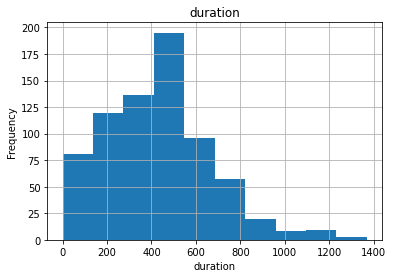

ultimate_minutes_mean: 428.0718232044199 ultimate_minutes_variance: 58463.016940874826 ultimate_minutes_standard_deviation: 241.7912672965565
most of the data can be found in this range: (-297.3019786852496, 1153.4456250940893)



In [62]:

ultimate_users = user_usages.query('plan == "ultimate"')
ultimate_minutes_mean = ultimate_users['duration'].mean()
ultimate_minutes_variance = np.var(ultimate_users['duration'])
ultimate_minutes_standard_deviation = np.sqrt(ultimate_minutes_variance)
ultimate_users.hist('duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()
print('ultimate_minutes_mean:', ultimate_minutes_mean, 'ultimate_minutes_variance:', ultimate_minutes_variance,
    'ultimate_minutes_standard_deviation:', ultimate_minutes_standard_deviation)
print('most of the data can be found in this range:', (ultimate_minutes_mean - 3 * ultimate_minutes_standard_deviation, ultimate_minutes_mean + 3 * ultimate_minutes_standard_deviation))
print()

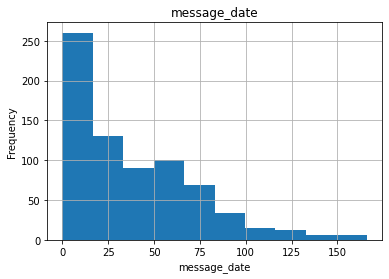

ultimate_texts_mean: 37.3439226519337 ultimate_texts_variance: 1208.15657908794 ultimate_texts_standard_deviation: 34.758546849486386
most of the data can be found in this range: (-66.93171789652547, 141.61956320039286)



In [63]:
ultimate_texts_mean = ultimate_users['message_date'].mean()
ultimate_texts_variance = np.var(ultimate_users['message_date'])
ultimate_texts_standard_deviation = np.sqrt(ultimate_texts_variance)
ultimate_users.hist('message_date')
plt.xlabel('message_date')
plt.ylabel('Frequency')
plt.show()
print('ultimate_texts_mean:', ultimate_texts_mean, 'ultimate_texts_variance:', ultimate_texts_variance,
    'ultimate_texts_standard_deviation:', ultimate_texts_standard_deviation)
print('most of the data can be found in this range:', (ultimate_texts_mean - 3 * ultimate_texts_standard_deviation, ultimate_texts_mean + 3 * ultimate_texts_standard_deviation))
print()

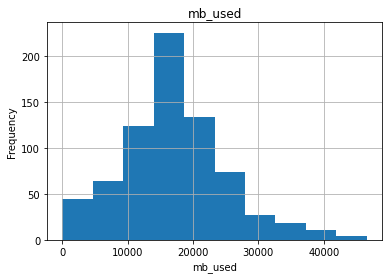

ultimate_data_mean: 17119.590856353592 ultimate_data_variance: 62854742.21241668 ultimate_data_standard_deviation: 7928.098272121548
most of the data can be found in this range: (-6664.703960011051, 40903.885672718236)



In [64]:
ultimate_data_mean = ultimate_users['mb_used'].mean()
ultimate_data_variance = np.var(ultimate_users['mb_used'])
ultimate_data_standard_deviation = np.sqrt(ultimate_data_variance)
ultimate_users.hist('mb_used')
plt.xlabel('mb_used')
plt.ylabel('Frequency')
plt.show()
print('ultimate_data_mean:', ultimate_data_mean, 'ultimate_data_variance:', ultimate_data_variance,
    'ultimate_data_standard_deviation:', ultimate_data_standard_deviation)
print('most of the data can be found in this range:', (ultimate_data_mean - 3 * ultimate_data_standard_deviation, ultimate_data_mean + 3 * ultimate_data_standard_deviation))
print()

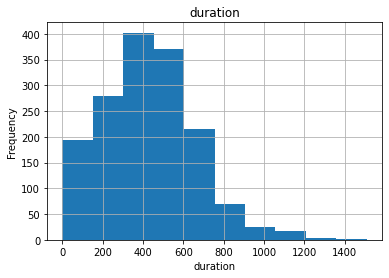

surf_minutes_mean: 427.12032932235593 surf_minutes_variance: 55420.45670514804 surf_minutes_standard_deviation: 235.4154980139329
most of the data can be found in this range: (-279.12616471944284, 1133.3668233641547)



In [65]:

surf_users = user_usages.query('plan == "surf"')
surf_minutes_mean = surf_users['duration'].mean()
surf_minutes_variance = np.var(surf_users['duration'])
surf_minutes_standard_deviation = np.sqrt(surf_minutes_variance)
surf_users.hist('duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()
print('surf_minutes_mean:', surf_minutes_mean, 'surf_minutes_variance:', surf_minutes_variance,
    'surf_minutes_standard_deviation:', surf_minutes_standard_deviation)
print('most of the data can be found in this range:', (surf_minutes_mean - 3 * surf_minutes_standard_deviation, surf_minutes_mean + 3 * surf_minutes_standard_deviation))
print()

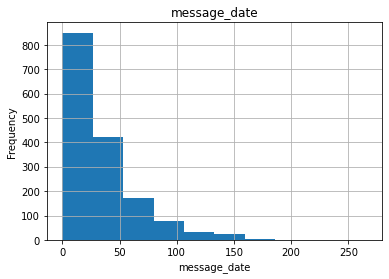

surf_texts_mean: 31.041165294490185 surf_texts_variance: 1125.404891865648 surf_texts_standard_deviation: 33.547054891087654
most of the data can be found in this range: (-69.59999937877278, 131.68232996775316)



In [66]:
surf_texts_mean = surf_users['message_date'].mean()
surf_texts_variance = np.var(surf_users['message_date'])
surf_texts_standard_deviation = np.sqrt(surf_texts_variance)
surf_users.hist('message_date')
plt.xlabel('message_date')
plt.ylabel('Frequency')
plt.show()
print('surf_texts_mean:', surf_texts_mean, 'surf_texts_variance:', surf_texts_variance,
    'surf_texts_standard_deviation:', surf_texts_standard_deviation)
print('most of the data can be found in this range:', (surf_texts_mean - 3 * surf_texts_standard_deviation, surf_texts_mean + 3 *surf_texts_standard_deviation))
print()

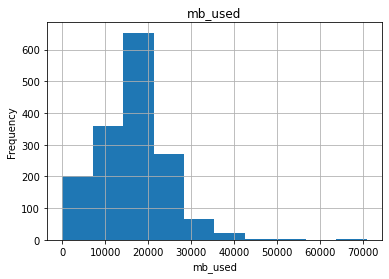

surf_data_mean: 16495.364110196326 surf_data_variance: 64969590.72111388 surf_data_standard_deviation: 8060.3716242561595
most of the data can be found in this range: (-7685.750762572152, 40676.47898296481)



In [67]:
surf_data_mean = surf_users['mb_used'].mean()
surf_data_variance = np.var(surf_users['mb_used'])
surf_data_standard_deviation = np.sqrt(surf_data_variance)
surf_users.hist('mb_used')
plt.xlabel('mb_used')
plt.ylabel('Frequency')
plt.show()
print('surf_data_mean:', surf_data_mean, 'surf_data_variance:', surf_data_variance,
    'surf_data_standard_deviation:', surf_data_standard_deviation)
print('most of the data can be found in this range:', (surf_data_mean - 3 * surf_data_standard_deviation, surf_data_mean + 3 * surf_data_standard_deviation))
print()

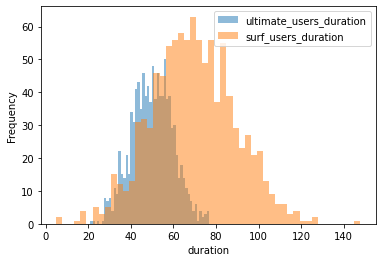

In [79]:
ultimate_users_duration =  np.var(ultimate_users['duration'])
surf_users_duration = np.var(surf_users['duration'])

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the two histograms on the same axis
ax.hist(data1, bins=50, alpha=0.5, label='ultimate_users_duration')
ax.hist(data2, bins=50, alpha=0.5, label='surf_users_duration')

# Add labels and legend to the plot
ax.set_xlabel('duration')
ax.set_ylabel('Frequency')
ax.legend()

# Display the plot
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I advice you to plot the same columns (like duration) for both plans on the same plot. This will make the comparison easier and more informative.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

Sorry, but I don't see any changes here. May be you have any questions?

Still do no understand how to fix It. may I have a hint?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.2.</b> <a class="tocSkip"></a>

https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/
    
Hope this link will be helpfull)

You'll find there two series, and we also have two: one for surf users, one for ultimate. So, this way will help ypu to compare the distributions)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.3.</b> <a class="tocSkip"></a>

Great plot now! Thanks for this correction, it really makes the comparison easier and more informative!

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Your calculations of mean and std are correct) 
    
    
Also possible to use np.std or std from pandas directly)

we can see from the histograms that have a sufficient amount of observations in our samples, the sampling distribution of the sample mean of any statistical population is quite normally distributed around the mean of these populations

Ultimate users:
ultimate_minutes_mean = 428
almost all values can be found within the range  (-297.30, 1153.44)
this range is the mean +-3 times the std
 messages ultimate plan users mean =  37.3
 messages ultimate plan users range =  -66.93,141.6195
 ultimate_texts_variance: 1208
 ultimate plan users internet usage mean = 17,119 GB
 The data  is skewed to the right, which means in more months, more users are using more internet volume then the mean.
 
 Surf plan: 
 call surf_minutes_mean = 427
 most of the data can be found in this range: (-279.12, 1133.36)
 surf_texts_mean: 31.04
most of the data can be found in this range: (-69.59, 131.66)
surf_data_ (internet usage) mean: 16,495 GB
most of the data can be found in this range: (-7685, 40676)

Comparing the 2 plans we can see:

The means in minutes and texts are really close, and also the upper ranges are very similar. The difference in internet usages is not huge, but the mean usage for the surf plan is actually higher then what is provided, there are many people using surf plan that might be better using the ultimate plan.


My hypotheses : The average profit from users of Ultimate and Surf plans calling plans are equal or very close.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great interpretation)

In [68]:
st.levene(surf_users['total_cost'], ultimate_users['total_cost'], center='mean')

LeveneResult(statistic=492.943591049274, pvalue=4.0593011252143755e-99)

In [69]:
alpha=0.05
result1= st.ttest_ind(
        surf_users['total_cost'],
        ultimate_users['total_cost'], equal_var=False)
print('p-value:', result1.pvalue)

if (result1.pvalue < alpha):
    print("we reject the null hypothesis")
else:
    print("we cant reject the null hypothesis")
    
surf_mean = surf_users['total_cost'].mean()
ultimate_mean = ultimate_users['total_cost'].mean()
print('surf_mean:', surf_mean)
print('ultimate_mean:', ultimate_mean)

p-value: 0.02044501814764915
we reject the null hypothesis
surf_mean: 71.97731475617479
ultimate_mean: 76.0621546961326


H0 : The avarage profit from users in NY-NJ area is different from that of the users from other regions


H1: The avarage profit from users in NY-NJ area is not different from that of the users from other regions

In [70]:
ny_nj_users = user_usages[user_usages['city'].str.contains("NY-NJ")]
ny_nj_users

other_regions = user_usages[-user_usages['city'].str.contains("NY-NJ")]
other_regions

,user_id,duration,message_date,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id,total_cost
0,1000,124.0,11.0,1901.47,3.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,1,70.00
1,1001,182.0,30.0,6919.15,9.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0,20.00
2,1001,315.0,44.0,13314.82,17.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0,20.00
3,1001,393.0,53.0,22330.49,28.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0,111.09
4,1001,426.0,36.0,18504.30,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,0,76.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.00,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,0,0,20.00
2299,1319,0.0,0.0,0.00,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,0,0,20.00
2300,1378,0.0,0.0,0.00,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,0,0,20.00
2301,1463,0.0,0.0,0.00,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,0,1,70.00


In [71]:
st.levene(ny_nj_users['total_cost'], other_regions['total_cost'], center='mean')


LeveneResult(statistic=3.451779618341287, pvalue=0.06331135187754676)

H0 : The avarage profit from users in NY-NJ area is not different from that of the users from other regions


H1: The avarage profit from users in NY-NJ area is different from that of the users from other regions



the sample groups do have equal variance, the test fails rejects, so we will use equal_var=True

In [72]:
result2= st.ttest_ind(
        ny_nj_users['total_cost'],
        other_regions['total_cost'], equal_var=True)
print('p-value:', result2.pvalue)

if (result2.pvalue < alpha):
    print("we reject the null hypothesis")
else:
    print("we cant reject the null hypothesis")
    
ny_nj_users_mean = ny_nj_users['total_cost'].mean()
other_regions_mean = other_regions['total_cost'].mean()
print('ny_nj_users_mean:', ny_nj_users_mean)
print('other_regions_mean:', other_regions_mean)

p-value: 0.4056762842335587
we cant reject the null hypothesis
ny_nj_users_mean: 71.28399470899471
other_regions_mean: 73.64978181818182


We reject the null hypothesis and accept the alternative hypothesis 


# <div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Your usage of tests is correct)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

However, I recommend you to add formulations of both hypothesises for each test, like this:
    
    H0: your null hypothesis here
        
    H1: your alternative hypothesis here

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.1.</b> <a class="tocSkip"></a>

So, here we have two tests, so for each one we need both hypothesises: one about they are the same, one about they are different.
    
    H0: your null hypothesis here
        
    H1: your alternative hypothesis here

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2.</b> <a class="tocSkip"></a>

Now this part is correct!

First question's answer: I decided that the null hypotheses will be that the profit from users of Ultimate and Surf plans are the same, and the alternative hypotheses is that the profit from users of Ultimate and Surf plans are different. we reject the null hypotheses with a really small p-value which is much smaller then our alpha(0.05)

Second question's answer: I decided that the null hypotheses will be that the average profit from users in NY-NJ area is the same as for the users from other regions.and the alternative hypotheses is that the average profit from users in NY-NJ area is different from that of the users from other regions. here we decided to reject the null hypothesis as well with a pretty small p-value 0.005 while our alpha is 0.05

General conclusions:

By  Comparing the 2 programs I have learned that the average of minutes and text are very close, and also the upper range. About the internet I learned that there is a difference between the two plans, the average in surf plan is higher than what is offered in the plan. There are many plans/clints who use the surf program and it is better for them to use the ultimate program according tp my research.

 2 tested hypotheses and 2 null (alternative) hypotheses:
 
a. The profit from users of Ultimate and Surf plans are very similar
a.1.The profit from users of Ultimate and Surf plans are different
b. The average profit from users in the NY-NJ area is equal to the users from other regions
b.1.The average profit from users in the NY-NJ area is different compered to the users from other regions.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great conclusion! I see that you have alternative hypothesises here, please, add them ti the hypothesises part as well)

<b>Overall reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for sending your project. Your project is really good!

I especially liked your usage of merge and plots)

        
<span class="text-danger">
    
However, I cann't accept it this time. We have a couple of tiny issues, I'm sure they'll be easy to fix for you)
    
Please, pay attention to the introduction) 

Also, please, check your usage of Gb try to fix that issue with histograms.
    
</span>

<span class="text-success"> 
    
Good luck!

One more time and you'll have it!

🍀
</div>

<b>Overall reviewer's comment v.1.</b> <a class="tocSkip"></a>

Hello!
    
Thank you for your corrections. 

Please, look through comments with v.1. Hope they will help you to improve your project. If you have any questions, you mau add them in blue boxes, and I'll try to answer them)

Good luck!

<b>Overall reviewer's comment v.2.</b> <a class="tocSkip"></a>

Hello!
    
Thank you for your corrections in hypothesises part. 

However, we still have that issue with histograms. Hope that example will help you)

Good luck!

🍀🍀🍀

<b>Overall reviewer's comment v.3.</b> <a class="tocSkip"></a>


Hello Yair!

Thanks for that correction! I'm glad to say that now your project is perfect) 

Congratulations, your code has passed review!

Good luck on the next sprint!


&#127881;
&#127881;
&#127881;
